In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("credit_risk_dataset.csv")

In [46]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### 1. Data Understanding & Cleaning

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [50]:
# Missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

loan_int_rate        3116
person_emp_length     895
dtype: int64

In [51]:
df['person_emp_length'] = df['person_emp_length'].fillna(0)
mean_intrest_rate =  df['loan_int_rate'].mean()
df['loan_int_rate'] = df['loan_int_rate'].fillna(mean_intrest_rate)

In [53]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [60]:
df['loan_status'] = df['loan_status'].astype(np.uint8)

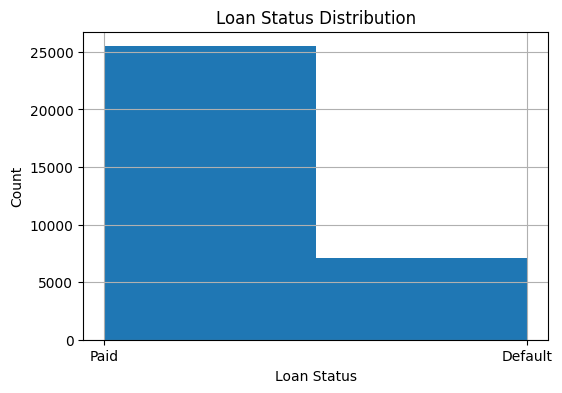

In [61]:
plt.figure(figsize=(6,4))
df['loan_status'].hist(bins=2)
plt.xticks([0,1], ['Paid', 'Default'])
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Distribution')
plt.show()


In [62]:
# Age, Employment length, Income & loan burden
df[['person_age','person_emp_length','person_income', 'loan_amnt', 'loan_percent_income']].describe()

,person_age,person_emp_length,person_income,loan_amnt,loan_percent_income
count,32581.000000,32581.000000,3.258100e+04,32581.000000,32581.000000
mean,27.734600,4.658114,6.607485e+04,9589.371106,0.170203
std,6.348078,4.159669,6.198312e+04,6322.086646,0.106782
min,20.000000,0.000000,4.000000e+03,500.000000,0.000000
25%,23.000000,2.000000,3.850000e+04,5000.000000,0.090000
50%,26.000000,4.000000,5.500000e+04,8000.000000,0.150000
75%,30.000000,7.000000,7.920000e+04,12200.000000,0.230000
max,144.000000,123.000000,6.000000e+06,35000.000000,0.830000


In [63]:
# # Handle missing values
# # Numerical columns
# num_cols = [
#     'person_age',
#     'person_income',
#     'person_emp_length',
#     'loan_amnt',
#     'loan_int_rate',
#     'loan_percent_income',
#     'cb_person_cred_hist_length'
# ]

# # Categorical columns
# cat_cols = [
#     'person_home_ownership',
#     'loan_intent',
#     'loan_grade',
#     'cb_person_default_on_file'
# ]

# # Median imputation for numerical
# for col in num_cols:
#     df[col] = df[col].fillna(df[col].median())

# # Mode imputation for categorical
# for col in cat_cols:
#     df[col] = df[col].fillna(df[col].mode()[0])

In [64]:
## Cap Extreme Values (Outlier Control)
# Flag unrealistic values
# df.loc[df['person_age'] < 18, 'person_age'] = np.nan
# df.loc[df['person_emp_length'] < 0, 'person_emp_length'] = np.nan
# df.loc[df['loan_percent_income'] > 1, 'loan_percent_income'] = np.nan

# Age cap
df['person_age'] = df['person_age'].clip(18, 70)

# Employment length cap
df['person_emp_length'] = df['person_emp_length'].clip(0, 40)

# Income winsorization
df['person_income'] = np.minimum(df['person_income'], df['person_income'].quantile(0.99))
df['loan_amnt'] = np.minimum(df['loan_amnt'], df['loan_amnt'].quantile(0.99))

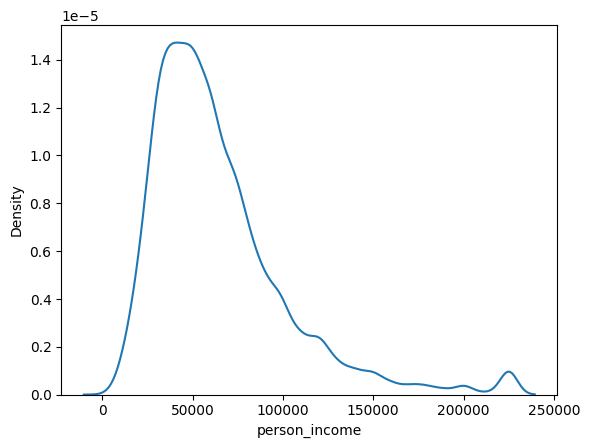

<Axes: xlabel='person_income', ylabel='Density'>

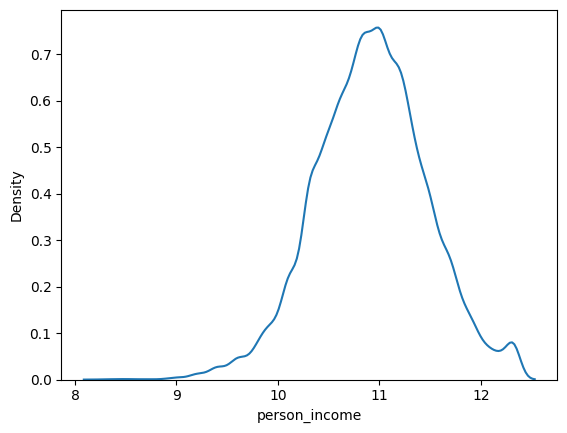

In [65]:
sns.kdeplot(df['person_income'])
plt.show()
sns.kdeplot(np.log1p(df['person_income']))

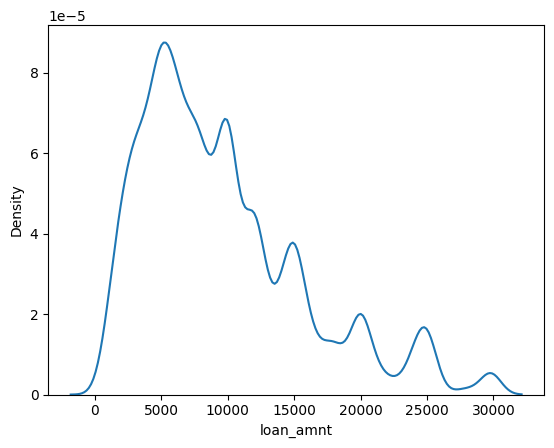

<Axes: xlabel='loan_amnt', ylabel='Density'>

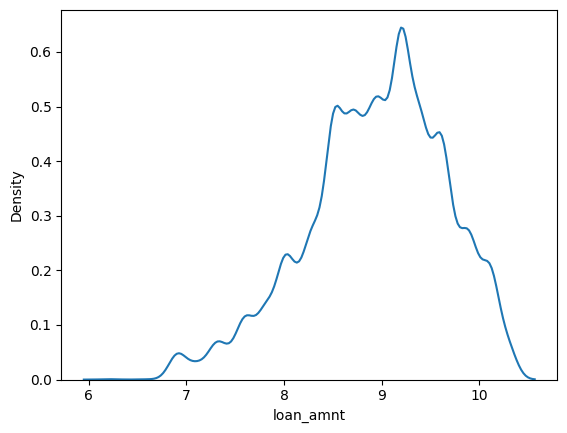

In [66]:
sns.kdeplot(df['loan_amnt'])
plt.show()
sns.kdeplot(np.log1p(df['loan_amnt']))

In [68]:
## Log Transform Skewed Variables
df['log_person_income'] = np.log1p(df['person_income'])
df['log_loan_amnt'] = np.log1p(df['loan_amnt'])

In [69]:
##  Final Dataset Check
df.isnull().sum().sum()

np.int64(0)

In [70]:
## Save Cleaned Dataset
df.to_csv("credit_risk_cleaned.csv", index=False)